# Deep Learning 101

This notebook presents the basics concepts that involve the concept of Deep Learning.

1. Linear Regression
* Logistic Regression
* **Artificial Neural Networks**
* Deep Neural Networks
* Convolutional Neural Networks

## 3. Artificial Neural Networks

These models are called *feedforward* because information **flows** through the function being evaluated from $x$, through the intermediate computations used to define $f$, and finally to the output $y$.

*Feedforward* neural networks are called networks because they are typically represented by composing together many different functions.

$$
    \begin{align}
    \hat{y} &= f(x) \\
            &= f^{(2)}(f^{(1)}(x))
    \end{align}
$$

$$f^{(i)}(h) = \sigma_i(W_ih + b_i)$$


$$\hat{y} = \sigma_2(W_2 \sigma_1(W_1 x + b_1) + b_2)$$
---

## Artificial Neural Networks with Keras and TensorFlow

**Activations functions** are non-linear functions applied when passing the output of a layer to the next layer or the final

| **Keras**      | **Example**                                                         | **Link**                 |
| -------------- |:------------------------------------------------------------------: | :-----------------------:|
| **Activation functions**| sigmoid, step, tanh, softmax, ReLU | [keras.io/activations/](https://keras.io/activations/)|

---

## 1. Load data

#### Load libraries

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


#### Getting the data

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Explore visual data

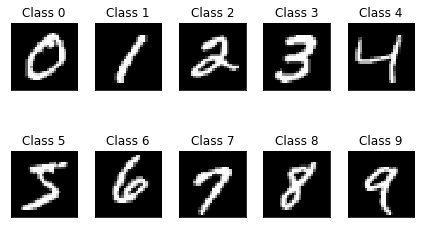

In [4]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [5]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_test.shape)

X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_test.shape (10000, 28, 28)
y_train.shape (10000,)


#### Reshaping and normalizing the inputs

In [6]:
# reshaping the inputs
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

# normalizing the inputs
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print('X_train reshape:', X_train.shape)
print('X_test reshape:', X_test.shape)

X_train reshape: (60000, 784)
X_test reshape: (10000, 784)


#### Convert class vectors to binary class matrices

In [7]:
# 10 classes
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print('y_train_cat shape:', y_train_cat.shape)
print('y_test_cat shape:', y_test_cat.shape)

y_train_cat shape: (60000, 10)
y_test_cat shape: (10000, 10)


## 2. Define model

#### Add the input-, hidden- and output-layers

In [8]:
# building a linear stack of layers with the sequential model
model = Sequential()
# Add the input layer and hidden layer 1
model.add(Dense(32, input_shape=(784,), activation='sigmoid'))
# Add the output layer
model.add(Dense(10, activation='softmax'))

#### Model visualization

In [9]:
# plot a Keras model
plot_model(model, to_file='img/model03_ann.png',
           show_shapes=True, show_layer_names=True)
# prints a summary representation of your model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


![Artificial neural network](img/model03_ann.png)

## 3. Compile model

In [10]:
# compiling the sequential model
model.compile('rmsprop', loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

## 4. Fit model

In [11]:
# training the model and saving metrics in history
history = model.fit(X_train, y_train_cat,
                    batch_size=256, epochs=50,
                    verbose=2,
                    validation_data=(X_test, y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
1s - loss: 1.1404 - categorical_accuracy: 0.7710 - val_loss: 0.6077 - val_categorical_accuracy: 0.8795
Epoch 2/50
0s - loss: 0.4735 - categorical_accuracy: 0.8910 - val_loss: 0.3733 - val_categorical_accuracy: 0.9073
Epoch 3/50
0s - loss: 0.3396 - categorical_accuracy: 0.9098 - val_loss: 0.3011 - val_categorical_accuracy: 0.9165
Epoch 4/50
0s - loss: 0.2872 - categorical_accuracy: 0.9206 - val_loss: 0.2656 - val_categorical_accuracy: 0.9231
Epoch 5/50
0s - loss: 0.2569 - categorical_accuracy: 0.9280 - val_loss: 0.2419 - val_categorical_accuracy: 0.9312
Epoch 6/50
0s - loss: 0.2353 - categorical_accuracy: 0.9333 - val_loss: 0.2254 - val_categorical_accuracy: 0.9349
Epoch 7/50
1s - loss: 0.2183 - categorical_accuracy: 0.9385 - val_loss: 0.2111 - val_categorical_accuracy: 0.9398
Epoch 8/50
0s - loss: 0.2048 - categorical_accuracy: 0.9422 - val_loss: 0.2010 - val_categorical_accuracy: 0.9402
Epoch 9/50
0s - loss: 0.1933 - categor

## 5. Evaluate model

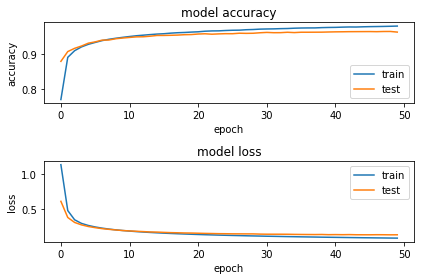

In [12]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [13]:
# evaluate model on test data
[test_loss, test_acc] = model.evaluate(X_test, y_test_cat)
print("Evaluation result on Test Data:\nLoss = {}\nAccuracy = {}".format(test_loss, test_acc))

 9760/10000 [============================>.] - ETA: 0sEvaluation result on Test Data:
Loss = 0.12181863158643245
Accuracy = 0.9627


## References

* [Deep Learning Book](http://www.deeplearningbook.org)

* [Zero to Deep Learning™ Udemy Video Course](https://github.com/dataweekends/zero_to_deep_learning_udemy)

* [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)